In [1]:
#imports
import pandas as pd 
from awpy.parser import DemoParser
from awpy.analytics.stats import player_stats
import json
import matplotlib.pyplot as plt
from awpy.visualization.plot import plot_map
from awpy.visualization.plot import plot_round
from IPython.display import Image
import os, sys
import seaborn as sns

In [2]:
games = []
for jsn in os.listdir("C:/Users/morri/Documents/Jupyter Notebooks/POC_CSGO/demos"):
    game = json.load(open("C:/Users/morri/Documents/Jupyter Notebooks/POC_CSGO/demos/{}".format(jsn)))
    games.append(game)


Hier maken we een lijst aan waar alle demo json bestanden in gezet worden. Hier gaan we later door loopen.

In [3]:
weapons = []
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        j = 0
        for kill in gameround['kills']:
            if kill['weapon'] not in weapons:
              weapons.append(kill['weapon'])  
            j += 1  
        i += 1
weapons

['Glock-18',
 'P250',
 'USP-S',
 'MAC-10',
 'Desert Eagle',
 'SSG 08',
 'Galil AR',
 'AK-47',
 'M4A1',
 'AWP',
 'C4',
 'Molotov',
 'HE Grenade',
 'Tec-9',
 'MP9',
 'Incendiary Grenade',
 'FAMAS',
 'Five-SeveN',
 'UMP-45',
 'Dual Berettas',
 'CZ75 Auto',
 'P2000',
 'Knife',
 'XM1014']

Hier maken we een lijst aan met alle wapens die gebruikt worden om een speler te doden. Hier kunnen we later mee bij houden hoe vaak elk wapen een speler dood.

In [4]:

#init dict's of maps
#map_dict_mouz = {}
#map_dict_enemy = {}
weapon_dict = {}
i=0
for k in weapons:
    #map_dict_mouz[maps[i]] = []
    #map_dict_enemy[maps[i]] = []
    weapon_dict[weapons[i]] = 0
    i += 1

weapon_dict
#weapon_dict[weapons[i]] += 1

{'Glock-18': 0,
 'P250': 0,
 'USP-S': 0,
 'MAC-10': 0,
 'Desert Eagle': 0,
 'SSG 08': 0,
 'Galil AR': 0,
 'AK-47': 0,
 'M4A1': 0,
 'AWP': 0,
 'C4': 0,
 'Molotov': 0,
 'HE Grenade': 0,
 'Tec-9': 0,
 'MP9': 0,
 'Incendiary Grenade': 0,
 'FAMAS': 0,
 'Five-SeveN': 0,
 'UMP-45': 0,
 'Dual Berettas': 0,
 'CZ75 Auto': 0,
 'P2000': 0,
 'Knife': 0,
 'XM1014': 0}

Dit zet de lijst met wapens om in een dictionary, waarmee we values kunnen toevoegen.

In [5]:
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            weapon_dict[gameround['kills'][j]['weapon']] +=1
            j += 1  
        i += 1
print(weapon_dict)

{'Glock-18': 111, 'P250': 40, 'USP-S': 118, 'MAC-10': 46, 'Desert Eagle': 81, 'SSG 08': 14, 'Galil AR': 106, 'AK-47': 1050, 'M4A1': 800, 'AWP': 368, 'C4': 24, 'Molotov': 8, 'HE Grenade': 36, 'Tec-9': 24, 'MP9': 61, 'Incendiary Grenade': 15, 'FAMAS': 66, 'Five-SeveN': 23, 'UMP-45': 9, 'Dual Berettas': 29, 'CZ75 Auto': 2, 'P2000': 1, 'Knife': 2, 'XM1014': 1}


Nu gaan we door elke game, door elke gameround, en elke kill. Er wordt dan gekeken welk wapen werdt gebruikt. De value van dat wapen wordt dan met 1 verhoogd.

In [6]:
df = pd.DataFrame.from_dict(data = weapon_dict, orient='index')
df

,0
Glock-18,111
P250,40
USP-S,118
MAC-10,46
Desert Eagle,81
SSG 08,14
Galil AR,106
AK-47,1050
M4A1,800
AWP,368


<function matplotlib.pyplot.show(close=None, block=None)>

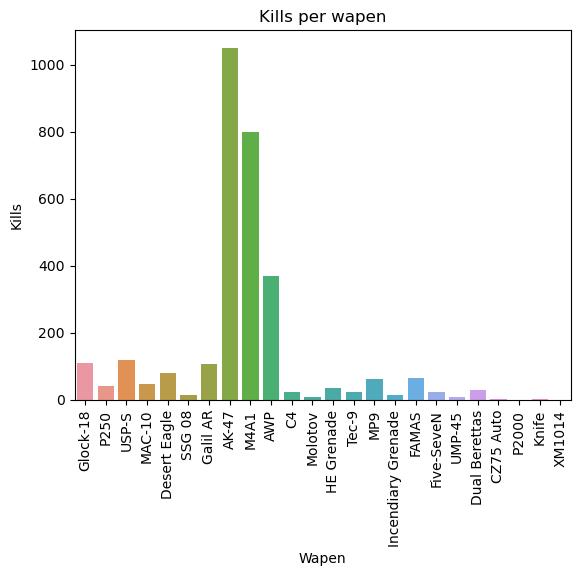

In [7]:
keys = list(weapon_dict.keys())
vals = [float(weapon_dict[k]) for k in keys]

sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90)
plt.title("Kills per wapen")
plt.xlabel("Wapen")
plt.ylabel("Kills")
plt.show

Dit genereert een staafgrafiek met de wapens op de x-as, en het aantal kills dat elk wapen heeft op de y-as. Hier kunnen we zien dat De AK-47 de meeste kills heeft, gevolgd door the M4A1 en de AWP. Deze wapens hebben veel meer kills dan de anderen. De rest komt amper boven 100 kills uit.

Hieruit valt te concluderen dat de AK-47, M4A1 en AWP de beste keuzes zijn als je veel kills wil krijgen. De rest van de wapens, blijken veel minder kills te krijgen. De P2000 en XM1014 hebben allebei zelfs maar 1 kill, die wil je dus absoluut vermijden.